## Analysing "Parks" in Toronto Neighbourhoods using Foursquare API

In [1]:
import pandas as pd
import requests

!conda install -c anaconda xlrd --yes

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - xlrd


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.12.5-py36h5~ --> anaconda::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1j-h7f98852_0 --> anaconda::openssl-1.1.1h-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-ha878542_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2

In [2]:
import numpy as np # library to handle data in a vectorized manner

!pip install pandas 

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests

import pandas as pd # library for data analsysis


!pip install bs4

!pip install lxml

In [3]:
from bs4 import BeautifulSoup

r = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

open('html_data', 'wb').write(r.content)


83143

In [4]:
with open("html_data") as fp:
    soup = BeautifulSoup(fp, "html.parser")

In [5]:
print(soup.title)

<title>List of postal codes of Canada: M - Wikipedia</title>


In [6]:
table = soup.find_all('table')
df_torontodata= pd.read_html(str(table))[0]

In [7]:
df_torontodata.head(20)

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


In [8]:
df_torontodata1=pd.Series(df_torontodata.values.ravel('C'))

In [9]:
df_torontodata1.head()

0                                    M1ANot assigned
1                                    M2ANot assigned
2                           M3ANorth York(Parkwoods)
3                    M4ANorth York(Victoria Village)
4    M5ADowntown Toronto(Regent Park / Harbourfront)
dtype: object

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(df_torontodata1)


In [11]:
df.columns = ['Borough']

df['Postal Code'] = df['Borough'].astype(str).str[:3]

In [12]:
df.head(20)

,Borough,Postal Code
0,M1ANot assigned,M1A
1,M2ANot assigned,M2A
2,M3ANorth York(Parkwoods),M3A
3,M4ANorth York(Victoria Village),M4A
4,M5ADowntown Toronto(Regent Park / Harbourfront),M5A
5,M6ANorth York(Lawrence Manor / Lawrence Heights),M6A
6,M7AQueen's Park(Ontario Provincial Government),M7A
7,M8ANot assigned,M8A
8,M9AEtobicoke(Islington Avenue),M9A
9,M1BScarborough(Malvern / Rouge),M1B


In [13]:
#df['Neighbourhood'] = df['Borough'].str.extract(r"\(([A-Za-z]+)\)", expand=False)

df['Neighbourhood'] = df['Borough'].str.extract(r"\((.*?)\)", flags=2, expand=True)

df=df.drop('Borough',1)

In [14]:
df=df.dropna()

df.reset_index(drop=True,inplace=True)

In [15]:
df.head()

,Postal Code,Neighbourhood
0,M3A,Parkwoods
1,M4A,Victoria Village
2,M5A,Regent Park / Harbourfront
3,M6A,Lawrence Manor / Lawrence Heights
4,M7A,Ontario Provincial Government


In [16]:
!conda install -c anaconda xlrd --yes


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - xlrd


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.12.5-py36h5~ --> anaconda::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1j-h7f98852_0 --> anaconda::openssl-1.1.1h-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [17]:
df_loc = pd.read_csv(r"/resources/labs/DS0701EN/Geospatial_Coordinates.csv")
df_loc.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [18]:
df_toronto= pd.merge(df,df_loc, on= 'Postal Code',  how = 'inner')

In [19]:
df_toronto.head()

,Postal Code,Neighbourhood,Latitude,Longitude
0,M3A,Parkwoods,43.753259,-79.329656
1,M4A,Victoria Village,43.725882,-79.315572
2,M5A,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Ontario Provincial Government,43.662301,-79.389494


In [20]:
df.shape


(103, 2)

In [21]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-ha878542_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.12.5-py36h5fab9bb_1
  openssl               anaconda::openssl-1.1.1h-h7b6447c_0 --> conda-forge::openssl-1.1.1j-h7f98852_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [22]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [23]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [24]:
CLIENT_ID = 'CKDIYAGEPXB2ARUSXYI1PQRF4XXNOVFNA1S0Q0SOSYGS2FDX' # your Foursquare ID
CLIENT_SECRET = 'YKGMTKPOX04Z4JH14LRSOYMQFU55X3DJVOYTDLNTSM1TVURX' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CKDIYAGEPXB2ARUSXYI1PQRF4XXNOVFNA1S0Q0SOSYGS2FDX
CLIENT_SECRET:YKGMTKPOX04Z4JH14LRSOYMQFU55X3DJVOYTDLNTSM1TVURX


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
toronto_venues= getNearbyVenues(names=df_toronto['Neighbourhood'], latitudes=df_toronto['Latitude'], longitudes=df_toronto['Longitude'], radius=500)


Parkwoods
Victoria Village
Regent Park / Harbourfront
Lawrence Manor / Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern / Rouge
Don Mills
Parkview Hill / Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale
Rouge Hill / Port Union / Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood
Guildwood / Morningside / West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor / Wilson Heights / Downsview North
Thorncliffe Park
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Scarborough Village
Fairview / Henry Farm / Oriole
Northwood Park / York University
The Danforth East
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
Kennedy Park / Ionview / East Birchmount Park
Bayview Village
Downsview
Th

In [27]:
print(toronto_venues.shape)
toronto_venues.head()

(2104, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,TTC stop #8380,43.752672,-79.326351,Bus Stop
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [28]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
Alderwood / Long Branch,9,9,9,9,9,9
Bathurst Manor / Wilson Heights / Downsview North,21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
Bedford Park / Lawrence Manor East,24,24,24,24,24,24
Berczy Park,59,59,59,59,59,59
Birch Cliff / Cliffside West,4,4,4,4,4,4
Brockton / Parkdale Village / Exhibition Place,23,23,23,23,23,23
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,15,15,15,15,15,15


In [29]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 271 uniques categories.


In [30]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
toronto_onehot.shape

(2104, 272)

In [32]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [33]:
toronto_grouped.shape

(94, 272)

## Relationship between Gym and the neighbourhood

In [48]:
 

toronto_part = toronto_grouped[['Neighbourhood', 'Park']]
toronto_part.head()



,Neighbourhood,Park
0,Agincourt,0.000000
1,Alderwood / Long Branch,0.000000
2,Bathurst Manor / Wilson Heights / Downsview North,0.047619
3,Bayview Village,0.000000
4,Bedford Park / Lawrence Manor East,0.000000


In [50]:
toronto_merged = pd.merge(df_toronto, toronto_part, on='Neighbourhood', how='inner') 
toronto_merged.head()

,Postal Code,Neighbourhood,Latitude,Longitude,Park
0,M3A,Parkwoods,43.753259,-79.329656,0.333333
1,M4A,Victoria Village,43.725882,-79.315572,0.000000
2,M5A,Regent Park / Harbourfront,43.654260,-79.360636,0.065217
3,M6A,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,0.000000
4,M7A,Ontario Provincial Government,43.662301,-79.389494,0.032258


## Predective Modeling

### Making Clusters of Toronto neighbourhoods based on parks


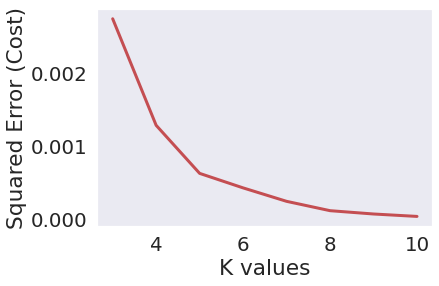

In [56]:
from sklearn.cluster import KMeans

toronto_part_clustering = toronto_part.drop('Neighbourhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

### After analysing using elbow method using Squared error for each K value, looks like K = 6 is the best value.¶


In [58]:

kclusters = 6

toronto_part_clustering = toronto_part.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

kmeans.labels_

array([0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0,
       0, 3, 0, 5, 0, 0, 0, 3, 0, 0, 3, 4, 0, 5, 0, 0, 0, 5, 4, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 3, 2, 1], dtype=int32)

In [82]:
#toronto_part.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df_toronto

pd.set_option("display.max_colwidth", None)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_part.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)

toronto_merged= toronto_merged.drop('Postal Code',1)
toronto_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,Park
0,Parkwoods,43.753259,-79.329656,5.0,0.333333
1,Victoria Village,43.725882,-79.315572,0.0,0.000000
2,Regent Park / Harbourfront,43.654260,-79.360636,4.0,0.065217
3,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,0.0,0.000000
4,Ontario Provincial Government,43.662301,-79.389494,0.0,0.032258


In [62]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Examing the Clusters:


In [73]:
#Cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Neighbourhood,Latitude,Longitude,Cluster Labels,Park
1,Victoria Village,43.725882,-79.315572,0.0,0.000000
3,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,0.0,0.000000
4,Ontario Provincial Government,43.662301,-79.389494,0.0,0.032258
5,Malvern / Rouge,43.806686,-79.194353,0.0,0.000000
6,Don Mills,43.745906,-79.352188,0.0,0.000000
7,Parkview Hill / Woodbine Gardens,43.706397,-79.309937,0.0,0.000000
8,"Garden District, Ryerson",43.657162,-79.378937,0.0,0.010000
10,West Deane Park / Princess Gardens / Martin Gr...,43.650943,-79.554724,0.0,0.000000
11,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,0.0,0.000000
12,Don Mills,43.725900,-79.340923,0.0,0.000000


In [85]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Neighbourhood,Latitude,Longitude,Cluster Labels,Park
20,Caledonia-Fairbanks,43.689026,-79.453512,1.0,0.500000
64,York Mills West,43.752758,-79.400049,1.0,0.666667
88,Rosedale,43.679563,-79.377529,1.0,0.500000


In [84]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Neighbourhood,Latitude,Longitude,Cluster Labels,Park
44,York Mills / Silver Hills,43.757490,-79.374714,2.0,1.0
51,Willowdale / Newtonbrook,43.789053,-79.408493,2.0,1.0


In [77]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Neighbourhood,Latitude,Longitude,Cluster Labels,Park
9,Glencairn,43.709577,-79.445073,3.0,0.25
13,Woodbine Heights,43.695344,-79.318389,3.0,0.20
34,The Danforth East,43.685347,-79.338106,3.0,0.20
48,North Park / Maple Leaf Park / Upwood Park,43.713756,-79.490074,3.0,0.25
75,Kingsview Village / St. Phillips / Martin Grov...,43.688905,-79.554724,3.0,0.25
82,Milliken / Agincourt North / Steeles East / L'...,43.815252,-79.284577,3.0,0.25


In [78]:
#Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,Neighbourhood,Latitude,Longitude,Cluster Labels,Park
2,Regent Park / Harbourfront,43.654260,-79.360636,4.0,0.065217
24,Christie,43.669542,-79.422564,4.0,0.125000
27,Bathurst Manor / Wilson Heights / Downsview North,43.754328,-79.442259,4.0,0.047619
28,Thorncliffe Park,43.705369,-79.349372,4.0,0.045455
30,Dufferin / Dovercourt Village,43.669005,-79.442259,4.0,0.071429
39,Downsview,43.737473,-79.464763,4.0,0.125000
43,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577,4.0,0.125000
45,Downsview,43.739015,-79.506944,4.0,0.125000
46,India Bazaar / The Beaches West,43.668999,-79.315572,4.0,0.095238
52,Downsview,43.728496,-79.495697,4.0,0.125000


In [83]:
#Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5]

,Neighbourhood,Latitude,Longitude,Cluster Labels,Park
0,Parkwoods,43.753259,-79.329656,5.0,0.333333
60,Lawrence Park,43.728020,-79.388790,5.0,0.333333
97,Old Mill South / King's Mill Park / Sunnylea / Humber Bay / Mimico NE / The Queensway East / Royal York South East / Kingsway Park South East,43.636258,-79.498509,5.0,0.333333
